# Sanity Random — headless checks
Goal: verify env API & metrics with a random policy. This notebook reads the JSONL
logs produced by `experiments/sanity_rollout.py`, prints simple stats, and plots
episode distance/return. No training here.


In [ ]:
import json, glob, statistics as st
import matplotlib.pyplot as plt

def load_last(tag: str):
    paths = sorted(glob.glob(f"../runs/*_{tag}.jsonl"))
    assert paths, f"No runs found for tag={tag}. (Run the script for '{tag}' first.)"
    path = paths[-1]
    print(f"[{tag}] reading:", path)
    episodes = [json.loads(line) for line in open(path, "r", encoding="utf-8")]
    return episodes

R = load_last("random")
H = load_last("heuristic")

Rd = [e["distance_px"] for e in R]    # distances
Hd = [e["distance_px"] for e in H]
Rr = [e["total_return"] for e in R]   # returns
Hr = [e["total_return"] for e in H]

print(f"Random    distance: mean={st.mean(Rd):.1f}  std={st.pstdev(Rd):.1f}   return: mean={st.mean(Rr):.2f}")
print(f"Heuristic distance: mean={st.mean(Hd):.1f}  std={st.pstdev(Hd):.1f}   return: mean={st.mean(Hr):.2f}")


Reading: ../runs\1757219588_random.jsonl


(8,
 {'episode': 0,
  'steps': 746,
  'flips': 100,
  'total_return': 1553.167,
  'time_s': 6.217,
  'distance_px': 1554,
  'level_seed': 3626764237,
  'out_of_bounds': True,
  'time_up': False})

Episodes: 8
Distance px  mean=1575.6  std=64.5
Return       mean=1575.13  std=64.51


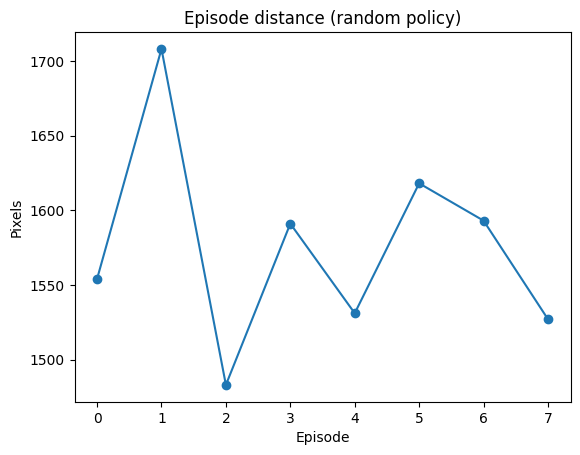

In [5]:
import statistics as st

dists = [e["distance_px"] for e in episodes]
rets  = [e["total_return"] for e in episodes]
print(f"Episodes: {len(episodes)}")
print(f"Distance px  mean={st.mean(dists):.1f}  std={st.pstdev(dists):.1f}")
print(f"Return       mean={st.mean(rets):.2f}  std={st.pstdev(rets):.2f}")

import matplotlib.pyplot as plt

plt.figure()
plt.plot(dists, marker="o")
plt.title("Episode distance (random policy)")
plt.xlabel("Episode")
plt.ylabel("Pixels")
plt.show()
